In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [164]:
df = pd.read_csv(r'D:\Courses SWE\9th Semester\DS424\Practice Final\dataset.csv')
df.head(10)

,Serial No.,Degree,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,B.Sc,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2,B.Sc,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3,B.Sc,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4,B.Sc,322.0,110.0,3.0,3.5,2.5,8.67,NaN,0.80
4,5,B.Sc,314.0,103.0,2.0,2.0,3.0,8.21,0.0,NaN
5,6,B.Sc,330.0,115.0,5.0,4.5,NaN,NaN,1.0,0.90
6,7,B.Sc,321.0,109.0,NaN,NaN,4.0,NaN,1.0,0.75
7,8,B.Sc,308.0,101.0,2.0,3.0,4.0,7.90,0.0,0.68
8,9,B.Sc,NaN,102.0,1.0,2.0,NaN,8.00,NaN,0.50
9,10,B.Sc,323.0,108.0,NaN,3.5,NaN,NaN,0.0,0.45


In [165]:
print("Shape: ", df.shape)
print(df.dtypes)

Shape:  (400, 10)
Serial No.             int64
Degree                object
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research             float64
Chance of Admit      float64
dtype: object


In [166]:
print(df.isna().sum())

Serial No.            0
Degree                1
GRE Score            19
TOEFL Score          13
University Rating    15
SOP                   5
LOR                   8
CGPA                 28
Research             18
Chance of Admit      37
dtype: int64


In [167]:
df = df.fillna(df.mean(numeric_only=True))
print(df.isna().sum())

Serial No.           0
Degree               1
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [168]:
df["Final result"] = (df["Chance of Admit"] >= 0.70).astype(int)
df["Final result"]

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    0
399    1
Name: Final result, Length: 400, dtype: int64

In [169]:
Y = df["Final result"]
X = df.drop(columns=["Chance of Admit", "Final result", "Serial No.", "Degree"])

In [170]:
X.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.00000,4.500000,4.50000,9.650000,1.000000
1,324.000000,107.0,4.00000,4.000000,4.50000,8.870000,1.000000
2,316.000000,104.0,3.00000,3.000000,3.50000,8.000000,1.000000
3,322.000000,110.0,3.00000,3.500000,2.50000,8.670000,0.549738
4,314.000000,103.0,2.00000,2.000000,3.00000,8.210000,0.000000
5,330.000000,115.0,5.00000,4.500000,3.46301,8.603871,1.000000
6,321.000000,109.0,3.07013,3.393671,4.00000,8.603871,1.000000
7,308.000000,101.0,2.00000,3.000000,4.00000,7.900000,0.000000
8,316.690289,102.0,1.00000,2.000000,3.46301,8.000000,0.549738
9,323.000000,108.0,3.07013,3.500000,3.46301,8.603871,0.000000


In [171]:
Y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    0
9    0
Name: Final result, dtype: int64

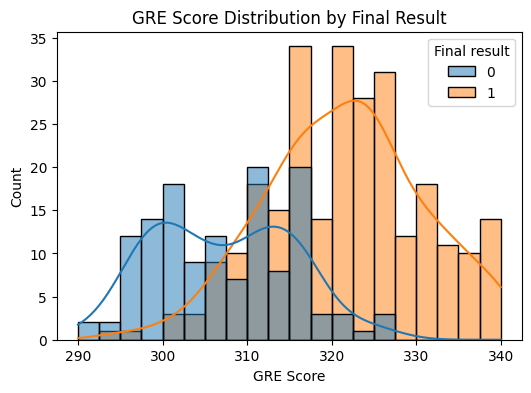

In [173]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="GRE Score", kde=True, bins=20, hue="Final result")
plt.title("GRE Score Distribution by Final Result")
plt.show()

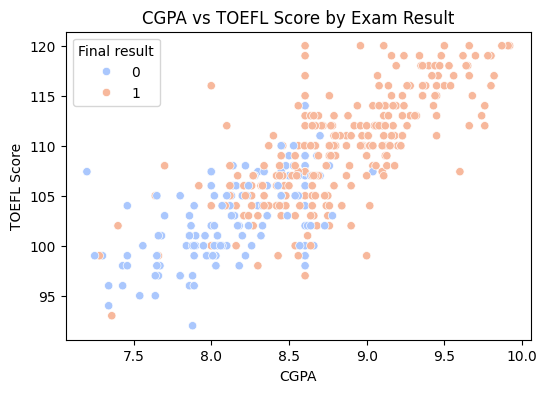

In [174]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="CGPA", y="TOEFL Score", hue="Final result", palette="coolwarm")
plt.title("CGPA vs TOEFL Score by Exam Result")
plt.show()

In [175]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [176]:
def build_model(input_dim, lr=1e-3, optimizer="adam"):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    if optimizer == "adam":
        opt = Adam(learning_rate=lr)
    else:
        opt = SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model


configs = [("adam",1e-3), ("adam",1e-2), ("sgd",1e-3), ("sgd",1e-2)]
results = []

for optimizer, lr in configs:
    model = build_model(X.shape[1], lr, optimizer)
    history = model.fit(x_train, 
                        y_train, 
                        epochs=50, 
                        batch_size=32, 
                        validation_split=0.2, 
                        verbose=0)
    
    y_pred = (model.predict(x_test) > 0.7).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append((optimizer, lr, acc, prec, rec, f1))




d:\Courses SWE\9th Semester\DS424\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


d:\Courses SWE\9th Semester\DS424\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


d:\Courses SWE\9th Semester\DS424\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


d:\Courses SWE\9th Semester\DS424\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Courses SWE\9th Semester\DS424\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [177]:
results_df = pd.DataFrame(results, columns=["Optimizer", "Learning Rate", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df)

  Optimizer  Learning Rate  Accuracy  Precision    Recall  F1 Score
0      adam          0.001    0.7875   0.930233  0.740741  0.824742
1      adam          0.010    0.7875   0.893617  0.777778  0.831683
2       sgd          0.001    0.3250   0.000000  0.000000  0.000000
3       sgd          0.010    0.7875   0.974359  0.703704  0.817204


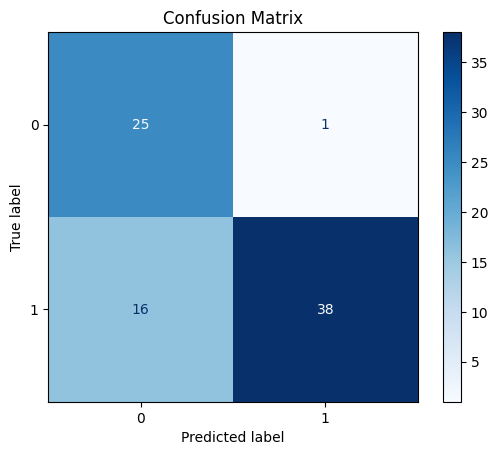

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()